In [1]:
import os
import shutil

SOURCE_BASE = "/kaggle/input/plant-village-dataset-updated"

DEST_BASE = "/kaggle/working/plant-village-merged"

plants = [
    "Apple",
    "Bell Pepper",
    "Cherry",
    "Corn (Maize)",
    "Grape",
    "Peach",
    "Potato",
    "Strawberry",
    "Tomato"
]

splits = ["Train", "Val", "Test"]


for split in splits:
    os.makedirs(os.path.join(DEST_BASE, split), exist_ok=True)


for plant in plants:
    for split in splits:
        plant_split_dir = os.path.join(SOURCE_BASE, plant, split)
        if not os.path.isdir(plant_split_dir):
            continue
        
        # Each disease folder inside Apple/Train, Apple/Val, etc.
        for disease in os.listdir(plant_split_dir):
            disease_folder = os.path.join(plant_split_dir, disease)
            if not os.path.isdir(disease_folder):
                continue
            
            # Make a combined class name to avoid collisions:
            # e.g., "Apple_Apple Scab"
            combined_class_name = f"{plant}_{disease}"
            
            # Create the destination subfolder
            dest_class_dir = os.path.join(DEST_BASE, split, combined_class_name)
            os.makedirs(dest_class_dir, exist_ok=True)
            
            # Copy all images
            for img_name in os.listdir(disease_folder):
                src_path = os.path.join(disease_folder, img_name)

                if os.path.isdir(src_path):
                    continue
                
                dst_path = os.path.join(dest_class_dir, img_name)
                # Copy or move the image (copy2 preserves metadata)
                shutil.copy2(src_path, dst_path)

print("Merging complete!")

Merging complete!


Found 1878 images belonging to 21 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


59/59 ━━━━━━━━━━━━━━━━━━━━ 29s 496ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


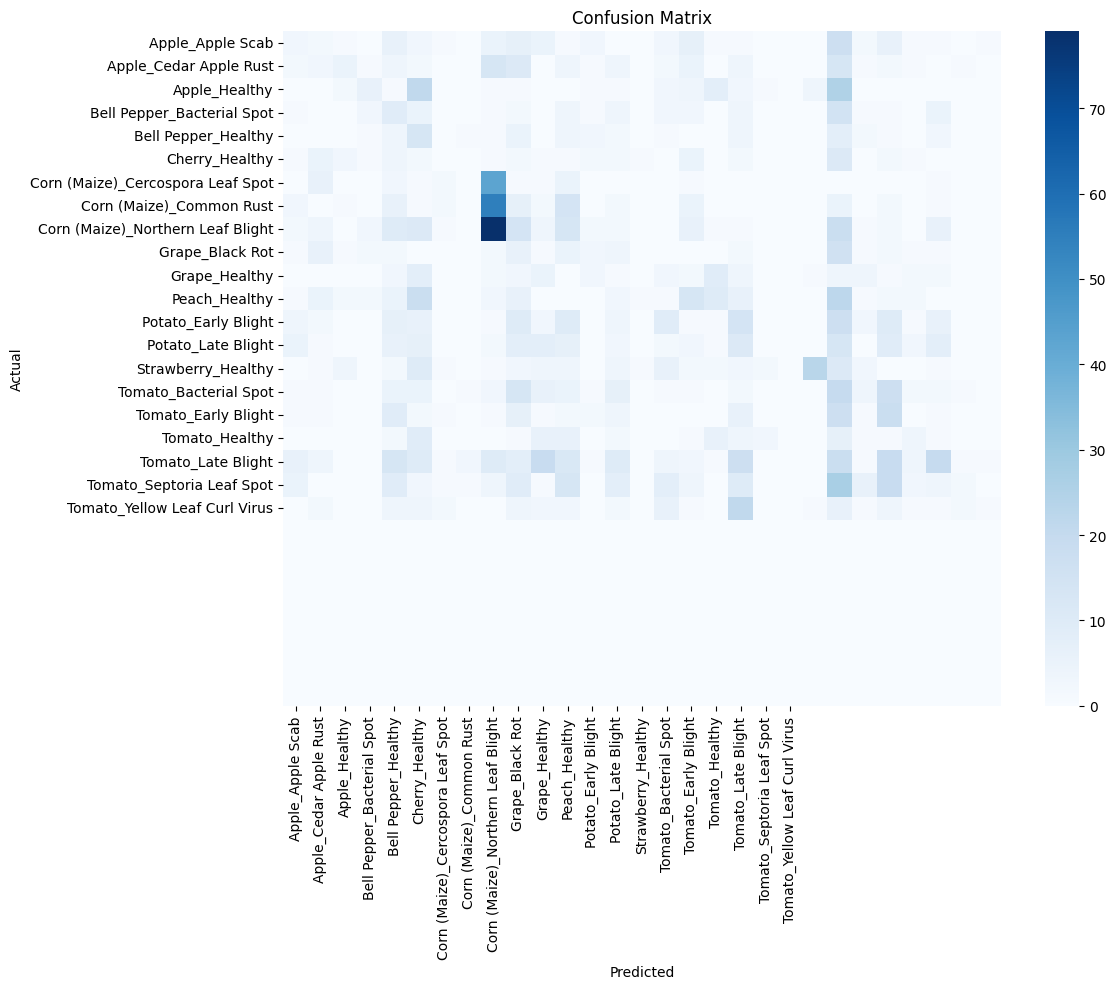

✅ Test Accuracy: 0.0729
✅ Macro F1 Score: 0.0407


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


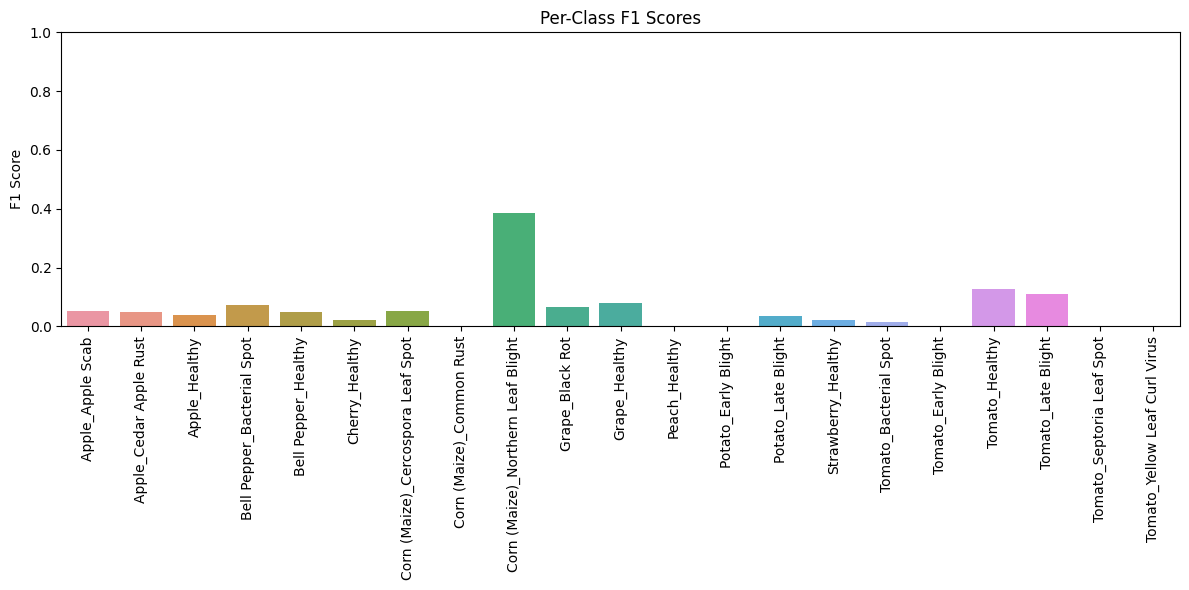

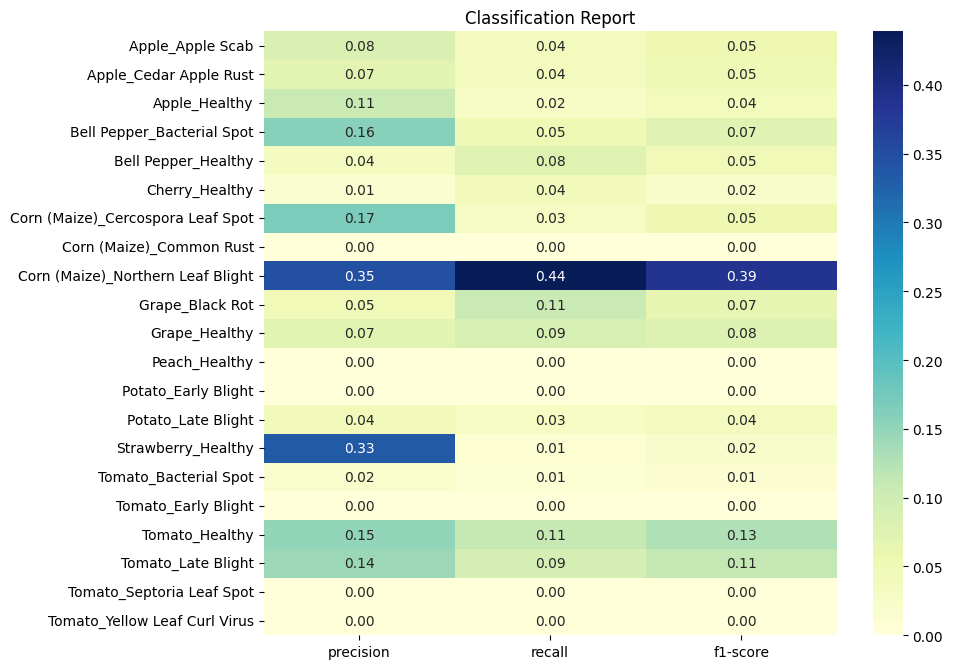

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

path = "/kaggle/input/plant-doc"

test_gen = datagen.flow_from_directory(
        path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
# -------------------------------
# STEP 1: Run prediction on test set
# -------------------------------
# If your model returns (features, predictions)
_, y_probs = student_model.predict(test_gen, verbose=1)
y_pred = np.argmax(y_probs, axis=1)
y_true = test_gen.classes

# Map class indices back to names (only those present in test set)
index_to_class = {v: k for k, v in test_gen.class_indices.items()}
present_class_indices = sorted(np.unique(y_true))
class_labels = [index_to_class[i] for i in present_class_indices]

# -------------------------------
# STEP 2: Classification Report
# -------------------------------
report = classification_report(
    y_true,
    y_pred,
    labels=present_class_indices,
    target_names=class_labels,
    output_dict=True
)
report_df = pd.DataFrame(report).transpose()

# -------------------------------
# STEP 3: Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# -------------------------------
# STEP 4: Accuracy & F1 Scores
# -------------------------------
acc = accuracy_score(y_true, y_pred)
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f"✅ Test Accuracy: {acc:.4f}")
print(f"✅ Macro F1 Score: {f1_macro:.4f}")

# -------------------------------
# STEP 5: Plot Per-Class F1 Scores
# -------------------------------
f1_scores = [report[label]['f1-score'] for label in class_labels]

plt.figure(figsize=(12, 6))
sns.barplot(x=class_labels, y=f1_scores)
plt.title("Per-Class F1 Scores")
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# -------------------------------
# Optional: Classification Report Table
# -------------------------------
plt.figure(figsize=(10, 0.5 + len(class_labels)*0.3))
sns.heatmap(report_df.iloc[:-3, :-1], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Classification Report")
plt.tight_layout()
plt.show()


In [13]:
# 1.1 Import dependencies
import tensorflow as tf
from tensorflow.keras import layers, Model, Input, regularizers

# 1.2 Re-declare squeeze_excite_block exactly as in training
def squeeze_excite_block(inputs, ratio=16):
    channel_axis = -1
    filters = inputs.shape[channel_axis]
    se = layers.GlobalAveragePooling2D()(inputs)
    se = layers.Reshape((1, 1, filters))(se)
    se = layers.Dense(filters // ratio, activation='relu')(se)
    se = layers.Dense(filters, activation='sigmoid')(se)
    return layers.multiply([inputs, se])

# 1.3 If you need to rebuild the student architecture to load weights instead:
def build_student_model(input_shape=(128,128,3), num_classes=29):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.SeparableConv2D(64, (3,3), padding='same', activation='relu',
                               depthwise_regularizer=regularizers.l2(1e-4),
                               pointwise_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = squeeze_excite_block(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(128, (3,3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(256, (3,3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    student_features = layers.GlobalAveragePooling2D()(x)  # (None, 256)
    predictions = layers.Dense(num_classes, activation='softmax')(student_features)
    model = Model(inputs=inputs, outputs=[student_features, predictions])
    return model


In [15]:
full_model_path = "/kaggle/input/disease_detection_model/tensorflow2/default/1/kfold_student_model (1).h5"
student_full = tf.keras.models.load_model(
    full_model_path,
    custom_objects={'squeeze_excite_block': squeeze_excite_block}
)


In [16]:
from tensorflow.keras import Model
feature_extractor = Model(inputs=student_full.input, outputs=student_full.output[0])
prediction_model = Model(inputs=student_full.input, outputs=student_full.output[1])


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA

# Paths: replace with your actual test directories
test_dirs = {
    "Test Set 1": "/kaggle/working/plant-village-merged/Test",
    "Test Set 2": "/kaggle/working/plant-village-merged/Val"
}

img_size = (128, 128)
batch_size = 32
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

# For reproducibility when sampling misclassified or PCA subset
rng = np.random.default_rng(42)



===== Evaluating: Test Set 1 =====
Found 1354 images belonging to 29 classes.
 1/43 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Overall Accuracy: 0.982 (98.2%)


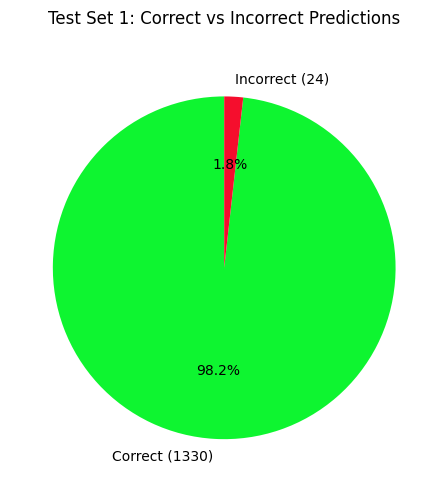

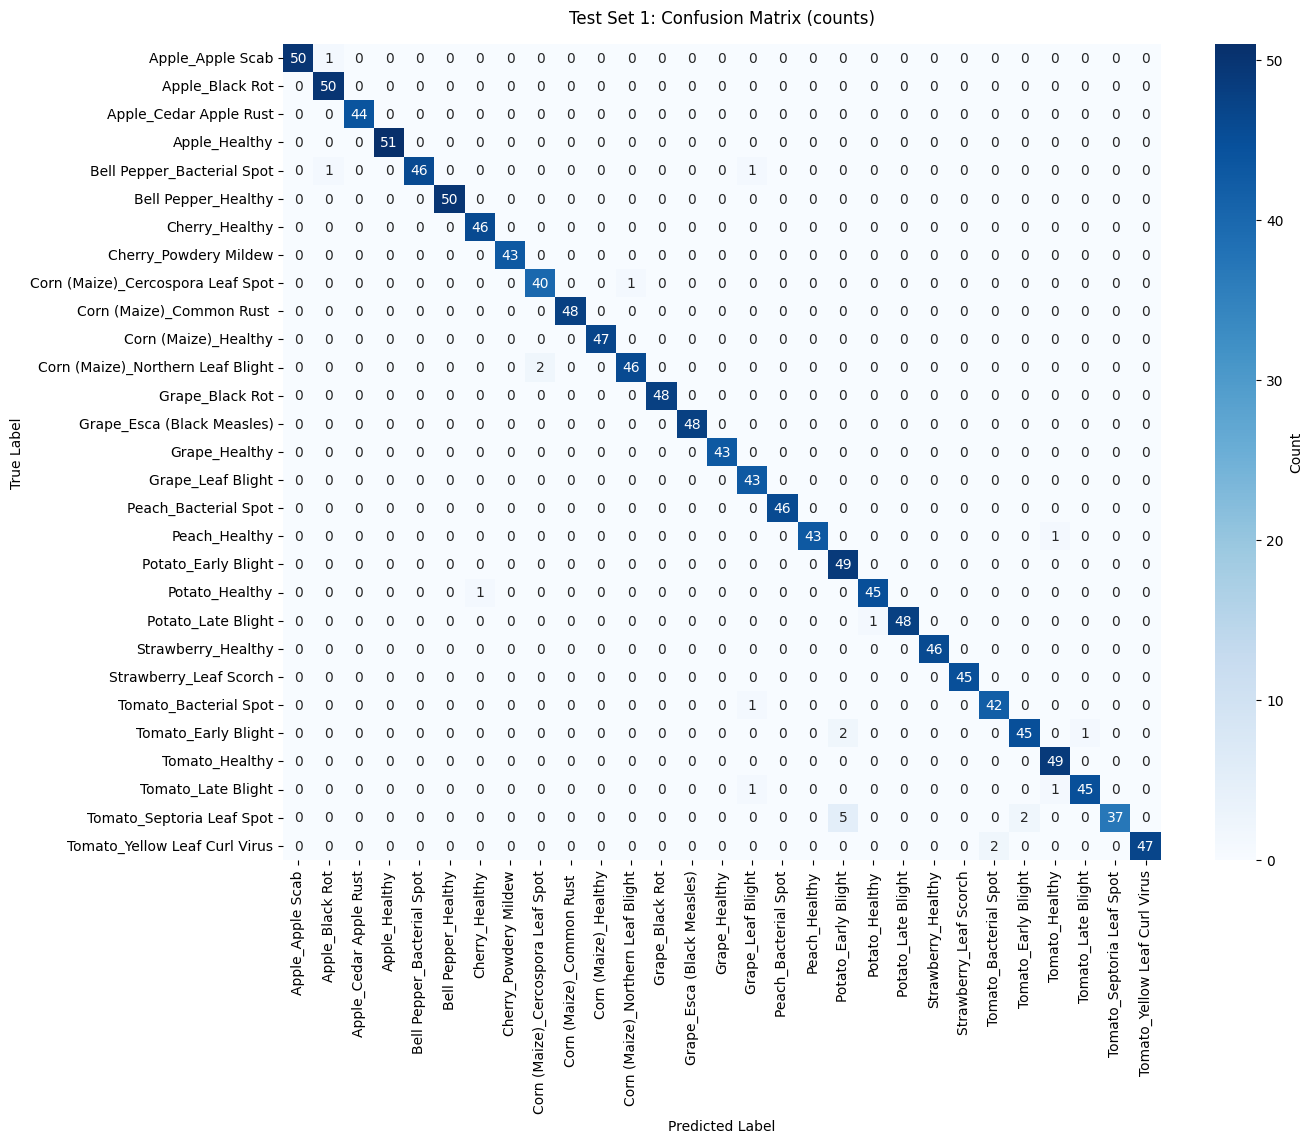


Test Set 1: Classification Report
                                   precision    recall  f1-score   support

                 Apple_Apple Scab       1.00      0.98      0.99        51
                  Apple_Black Rot       0.96      1.00      0.98        50
           Apple_Cedar Apple Rust       1.00      1.00      1.00        44
                    Apple_Healthy       1.00      1.00      1.00        51
       Bell Pepper_Bacterial Spot       1.00      0.96      0.98        48
              Bell Pepper_Healthy       1.00      1.00      1.00        50
                   Cherry_Healthy       0.98      1.00      0.99        46
            Cherry_Powdery Mildew       1.00      1.00      1.00        43
Corn (Maize)_Cercospora Leaf Spot       0.95      0.98      0.96        41
        Corn (Maize)_Common Rust        1.00      1.00      1.00        48
             Corn (Maize)_Healthy       1.00      1.00      1.00        47
Corn (Maize)_Northern Leaf Blight       0.98      0.96      0.97

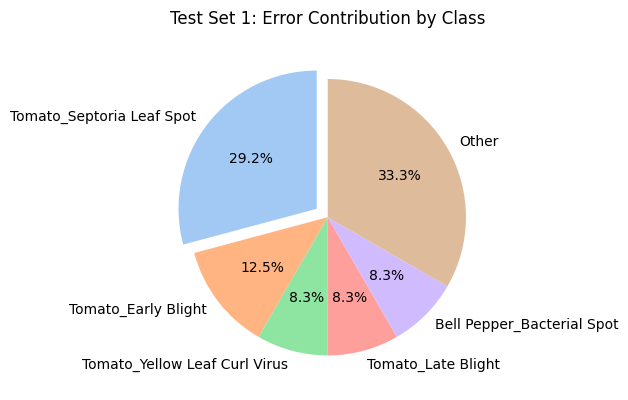

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


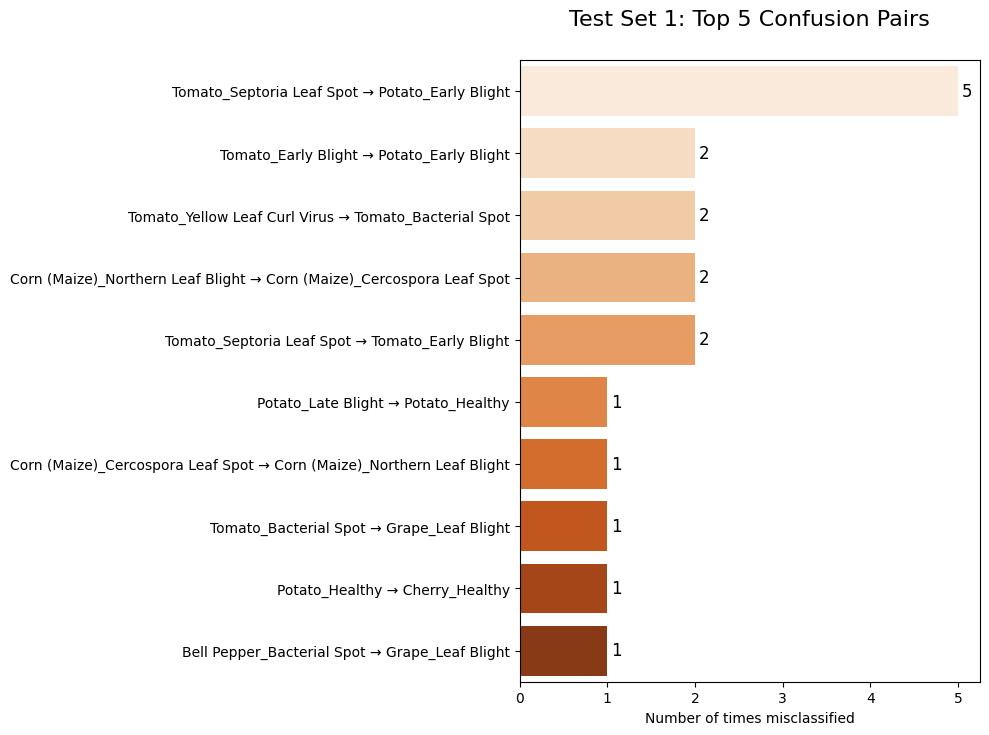

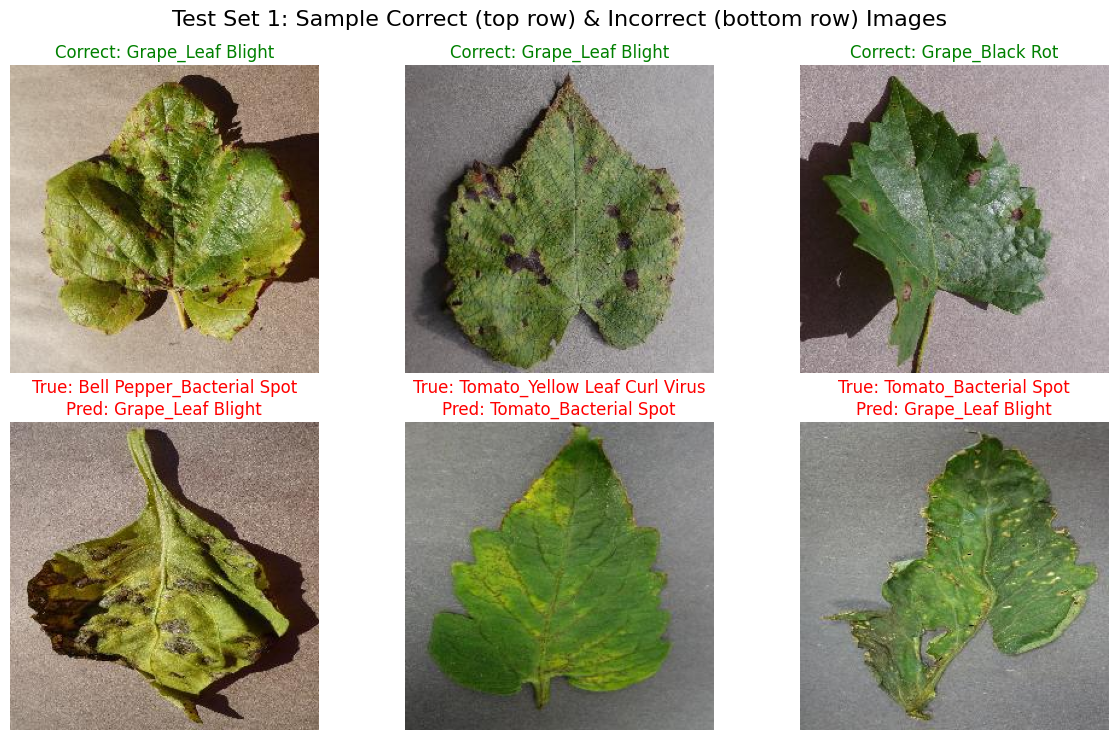


===== Evaluating: Test Set 2 =====
Found 12067 images belonging to 29 classes.
  1/378 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


378/378 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step
Overall Accuracy: 0.981 (98.1%)


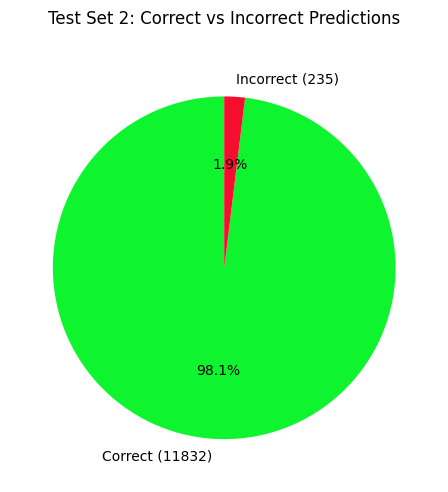

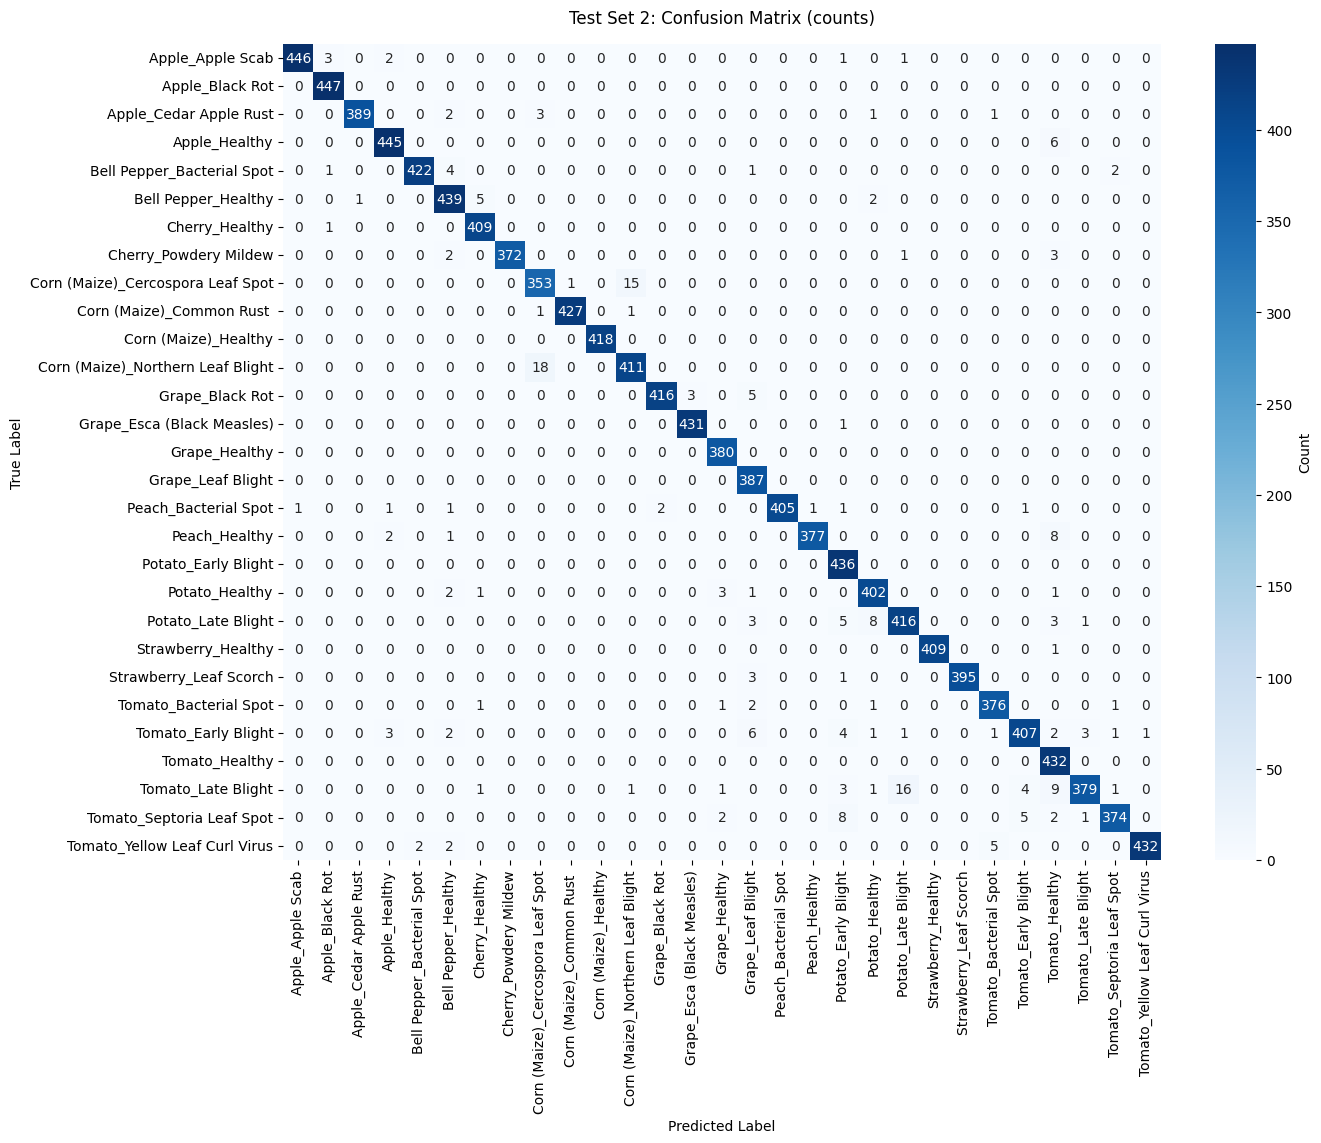


Test Set 2: Classification Report
                                   precision    recall  f1-score   support

                 Apple_Apple Scab       1.00      0.98      0.99       453
                  Apple_Black Rot       0.99      1.00      0.99       447
           Apple_Cedar Apple Rust       1.00      0.98      0.99       396
                    Apple_Healthy       0.98      0.99      0.98       451
       Bell Pepper_Bacterial Spot       1.00      0.98      0.99       430
              Bell Pepper_Healthy       0.96      0.98      0.97       447
                   Cherry_Healthy       0.98      1.00      0.99       410
            Cherry_Powdery Mildew       1.00      0.98      0.99       378
Corn (Maize)_Cercospora Leaf Spot       0.94      0.96      0.95       369
        Corn (Maize)_Common Rust        1.00      1.00      1.00       429
             Corn (Maize)_Healthy       1.00      1.00      1.00       418
Corn (Maize)_Northern Leaf Blight       0.96      0.96      0.96

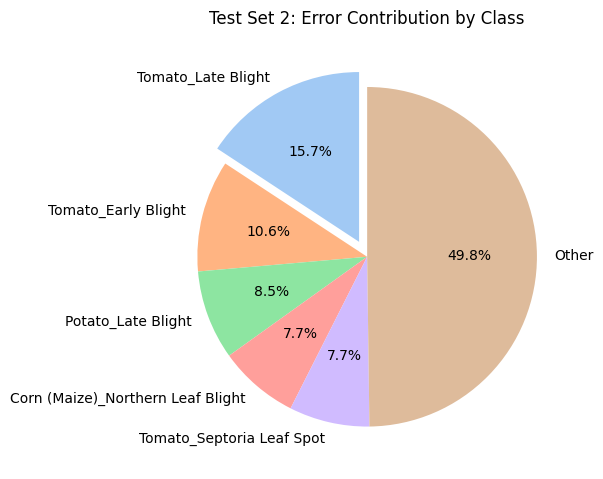

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


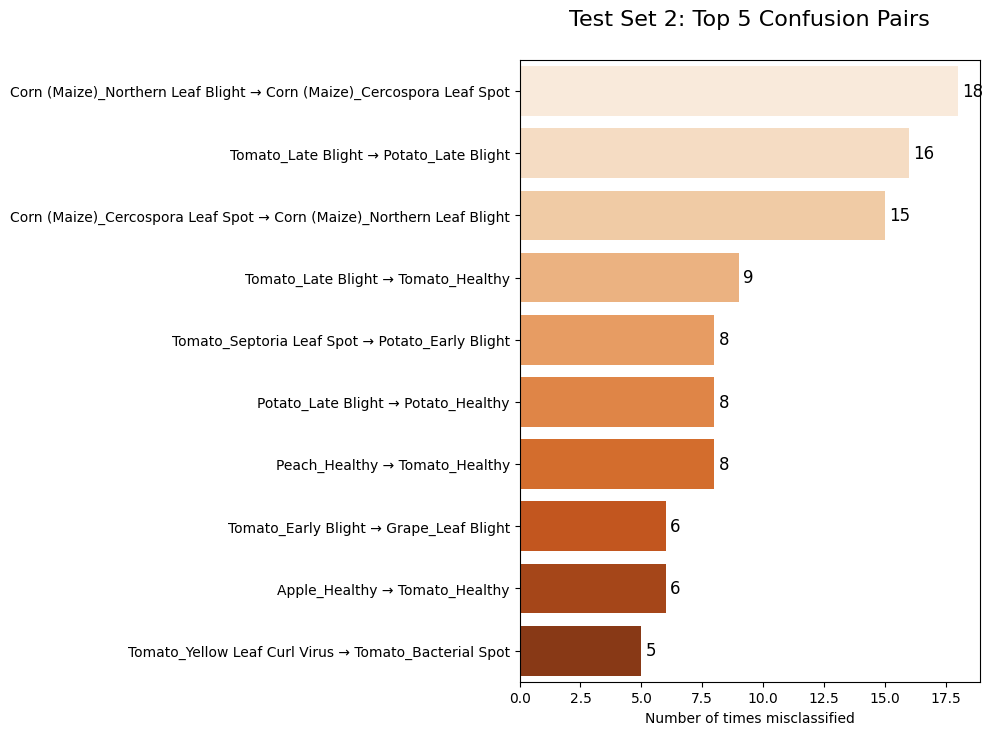

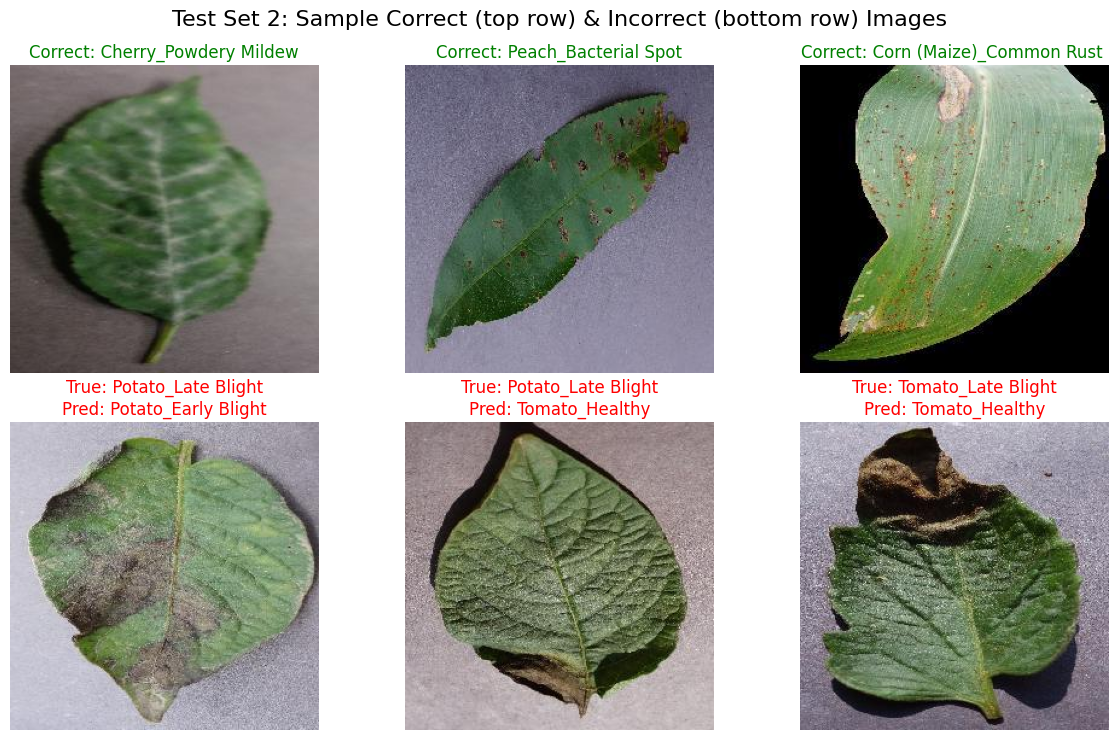

In [41]:
# ---------------------------
# 3. Evaluation loop producing requested plots
# ---------------------------
for name, path in test_dirs.items():
    print(f"\n===== Evaluating: {name} =====")
    # 3.1 Create generator (shuffle=False to align filepaths & labels)
    test_gen = datagen.flow_from_directory(
        path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    class_labels = list(test_gen.class_indices.keys())
    num_classes = len(class_labels)
    n_samples = len(test_gen.classes)

    # Store filepaths for sample images
    try:
        filepaths = np.array(test_gen.filepaths)
    except AttributeError:
        filepaths = np.array([os.path.join(test_gen.directory, f) for f in test_gen.filenames])

    # 3.2 Get predictions
    probs = prediction_model.predict(test_gen, verbose=1)  # shape (n_samples, num_classes)
    y_true = test_gen.classes
    y_pred = np.argmax(probs, axis=1)

    # 3.3 Overall accuracy
    overall_acc = np.mean(y_pred == y_true)
    print(f"Overall Accuracy: {overall_acc:.3f} ({overall_acc*100:.1f}%)")

    # ---- Plot 1: Overall accuracy pie ----
    correct_count = np.sum(y_pred == y_true)
    incorrect_count = n_samples - correct_count
    plt.figure(figsize=(5,5))
    plt.pie(
        [correct_count, incorrect_count],
        labels=[f"Correct ({correct_count})", f"Incorrect ({incorrect_count})"],
        colors=['#0ef530','#f50e2d'],
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f"{name}: Correct vs Incorrect Predictions", y=1.05)
    plt.tight_layout()
    plt.show()

    # 3.4 Confusion matrix and per-class accuracy
    cm = confusion_matrix(y_true, y_pred, labels=list(range(num_classes)))
    support = cm.sum(axis=1)  # number of true samples per class
    per_class_acc = np.array([cm[i,i]/support[i] if support[i]>0 else np.nan for i in range(num_classes)])

    # ---- Plot 2: Confusion matrix heatmap with values ----
    # Show counts in each cell
    plt.figure(figsize=(14, 12))
    ax = sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap="Blues",
        xticklabels=class_labels,
        yticklabels=class_labels,
        cbar_kws={'label': 'Count'}
    )
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    plt.title(f"{name}: Confusion Matrix (counts)", pad=15)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()


    # ---- Plot 3: Classification report printed as plain text (no colors) ----
    print(f"\n{name}: Classification Report")
    report_text = classification_report(y_true, y_pred, target_names=class_labels)
    print(report_text)
    

    # ---- Plot 4: Error contribution pie ----
    # error_counts per class = support[i] - correct_count[i]
    correct_counts = np.array([cm[i,i] for i in range(num_classes)])
    error_counts = support - correct_counts
    err_idx = np.where(error_counts > 0)[0]
    if err_idx.size > 0:
        total_errors = error_counts.sum()
        # pick top 5 classes by error count
        sorted_err = np.argsort(error_counts[err_idx])[::-1]
        top5_err_idx = err_idx[sorted_err][:5]
        top5_names = [class_labels[i] for i in top5_err_idx]
        top5_counts = [int(error_counts[i]) for i in top5_err_idx]
        other_count = int(total_errors - sum(top5_counts))
        pie_labels = top5_names + (["Other"] if other_count>0 else [])
        pie_sizes = top5_counts + ([other_count] if other_count>0 else [])
        explode = [0.1] + [0]* (len(pie_labels)-1)
        plt.figure(figsize=(6,6))
        plt.pie(
            pie_sizes,
            labels=pie_labels,
            autopct=lambda pct: f"{pct:.1f}%",
            explode=explode,
            startangle=90,
            colors=sns.color_palette("pastel")[:len(pie_labels)]
        )
        plt.title(f"{name}: Error Contribution by Class", pad=15)
        plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.show()
    else:
        print("No errors to attribute in pie chart (all classes perfect?).")

    # ---- Plot 5: Top confusion pairs ----
    cm_no_diag = cm.copy().astype(int)
    np.fill_diagonal(cm_no_diag, 0)
    flat = cm_no_diag.flatten()
    if flat.max() > 0:
        top_conf_idx = np.argsort(flat)[-10:][::-1]
        pairs = []
        counts = []
        for idx in top_conf_idx:
            count = int(flat[idx])
            if count <= 0:
                continue
            true_i = idx // num_classes
            pred_j = idx % num_classes
            pairs.append(f"{class_labels[true_i]} → {class_labels[pred_j]}")
            counts.append(count)
        if pairs:
            plt.figure(figsize=(10,8))
            ax = sns.barplot(x=counts, y=pairs, palette="Oranges")
            plt.xlabel("Number of times misclassified")
            plt.title(f"{name}: Top 5 Confusion Pairs", pad=25, fontsize=16)
            for p in ax.patches:
                width = p.get_width()
                ax.annotate(f"{int(width)}", (width, p.get_y() + p.get_height()/2),
                            va='center', ha='left', fontsize=12, xytext=(3,0), textcoords='offset points')
            plt.tight_layout()
            plt.subplots_adjust(top=0.85)
            plt.show()
    else:
        print("No misclassifications, so no confusion pairs to show.")

        # ---- Plot: Sample images in matrix form (up to 3 correct + 3 incorrect) ----
    correct_idx = np.where(y_pred == y_true)[0]
    wrong_idx = np.where(y_pred != y_true)[0]
    n_show_corr = min(3, len(correct_idx))
    n_show_wr = min(3, len(wrong_idx))

    if n_show_corr + n_show_wr > 0:
        # Randomly select indices
        chosen_corr = rng.choice(correct_idx, size=n_show_corr, replace=False) if n_show_corr > 0 else []
        chosen_wr = rng.choice(wrong_idx, size=n_show_wr, replace=False) if n_show_wr > 0 else []

        # Arrange in 2 rows: first row correct, second row incorrect
        n_cols = max(n_show_corr, n_show_wr)
        n_rows = 2
        plt.figure(figsize=(4 * n_cols, 4 * n_rows))

        # First row: correct predictions
        for j in range(n_cols):
            plt_index = j + 1  # subplot index starts at 1
            plt.subplot(n_rows, n_cols, plt_index)
            if j < n_show_corr:
                idx = chosen_corr[j]
                img_path = filepaths[idx]
                try:
                    img = mpimg.imread(img_path)
                except Exception:
                    from PIL import Image
                    img = np.array(Image.open(img_path).convert('RGB'))
                plt.imshow(img)
                lbl = class_labels[y_true[idx]]
                plt.title(f"Correct: {lbl}", color='green', fontsize=12)
            else:
                # empty plot
                plt.axis('off')
            plt.axis('off')

        # Second row: incorrect predictions
        for j in range(n_cols):
            plt_index = n_cols + j + 1  # second row index
            plt.subplot(n_rows, n_cols, plt_index)
            if j < n_show_wr:
                idx = chosen_wr[j]
                img_path = filepaths[idx]
                try:
                    img = mpimg.imread(img_path)
                except Exception:
                    from PIL import Image
                    img = np.array(Image.open(img_path).convert('RGB'))
                plt.imshow(img)
                true_lbl = class_labels[y_true[idx]]
                pred_lbl = class_labels[y_pred[idx]]
                plt.title(f"True: {true_lbl}\nPred: {pred_lbl}", color='red', fontsize=12)
            else:
                # empty plot
                plt.axis('off')
            plt.axis('off')

        plt.suptitle(f"{name}: Sample Correct (top row) & Incorrect (bottom row) Images", y=0.92, fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()
    else:
        print("No sample images to display for correct/incorrect.")